# Principal component analysis

https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf

In this section, assume the data $\mathcal{D}=\{X_i\}_{i\in [n]}$ is centered, namely,

$$\mu=\frac{1}{n}\sum_i X_i=0$$

In principal component analysis, our goal is to find a low dimensional representation of the data. In particular, we want to find a lower dimensional hyperplane that best describes our data. 

## Projection to a line

We start with a one dimenional problem: consider projecting the data onto a line. From the figure, it can be seen that choice 3 is a better projection than the rest since it preserves most variance in the data. <br>

### View 1: Maximizing variance

The projection of $x_i$ onto the line spanned by $w$ is given by $(x_i\cdot w)$. The mean of these projection is zero since

$$\frac{1}{n}\sum_{i}(x_i\cdot w) w = \Bigg(\bigg(\frac{1}{n}\sum_i x_i\bigg)\cdot w\Bigg)w=0$$

Given $w$, the projected points therefore are $z_i=x_i\cdot w$. We want to find $w$ that maximizes the variance of these scalars. Recall that the variance of a list of number is given by

$$\frac{1}{n}\sum_{i=1}^n z_i^2 - \bigg(\frac{1}{n}\sum_{i=1}^n z_i\bigg)^2$$

But as we've shown earlier, the mean of the projection is zero. The variance is therefore given by the first term. We can frame this as an optimization problem

$$\max_w \frac{1}{n}\sum_{i=1}^n z_i^2 = \max_w \frac{1}{n}\sum_{i=1}^n (x_i\cdot w)^2$$

### View 2: Minimizing error

We can also develop the same optimization problem by minimizing the error. Note that the error induced by dimensionality reduction is given by $\epsilon_i = x_i - (x_i\cdot w) w$. We want to make the overall error small. This gives us the following problem

$$\min_w ||x_i - (x_i\cdot w) w||_2^2$$

Expanding the norm term gives us

$$
\begin{align*}
||x_i - (x_i\cdot w) w||_2^2 &= x_i^Tx_i - (x_i^Tw)^2 - (x_i^Tw)^2 + (x_i^Tw)^2 w^Tw\\
 &= x_i^Tx_i - (x_i^Tw)^2 
\end{align*}
$$

The optimization problem can therefore be rewritten as

$$\min_w x_i^Tx_i - (x_i^Tw)^2 $$

Since the first term is independnet of $w$

$$\max_w \frac{1}{n}\sum_i(x_i^Tw)^2 $$

Which is the same as maximizing the variance. 

## Solution methods

Let $X$ be the matrix created by concatenating the data $x_i$, then the optimization problem can be rewritten as

$$\max_w\frac{1}{n} w^TX^TXw\hspace{5mm}\text{subject to}\;||w||_2^2=1$$

Letting $\Sigma = (X^TX)/n$ denote the sample covariance matrix, then the Lagrangian is given by

$$\mathcal{L}(w, \lambda)= w^T\Sigma w - \lambda (||w||_2^2-1)$$

The first order condition is given by

$$
\begin{equation*}
\begin{cases}
    \frac{\partial \mathcal{L}}{\partial w} = 2\Sigma w - 2\lambda w = 0\\
    \frac{\partial \mathcal{L}}{\partial \lambda} =||w||_2^2-1=0
\end{cases}
\end{equation*}
$$

This suggests that $w$ with unit norm is given by 

$$\Sigma w = \lambda w$$

Note that $w$ essentially corresponds to the eigenvector of $\Sigma$, with $\lambda$ being the corresponding eigenvalue. In this case, the objective becomes

$$w^T\Sigma w=w^T(\lambda w) = \lambda $$

This implies that we want to choose $w$ to be the eigenvector of $\Sigma$ with the largest eigenvalue. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

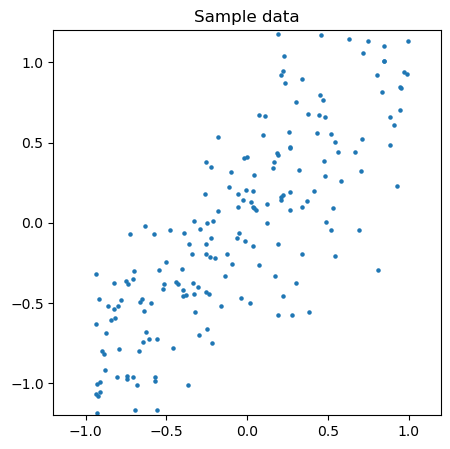

In [95]:
x = 2 * np.random.rand(200) - 1
y = 1 * x + 0.4 * np.random.randn(200)
X = np.column_stack((x, y))

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("Sample data")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.show()

In [96]:
covariance = np.cov(X, rowvar=False)
print(covariance)

[[0.31428168 0.3135436 ]
 [0.3135436  0.47174429]]


In [97]:
eigenvalues, eigenvectors = np.linalg.eig(covariance)
print(f"Eigenvector 1: {eigenvectors[0]} with eigenvalue {eigenvalues[0]}")
print(f"Eigenvector 2: {eigenvectors[1]} with eigenvalue {eigenvalues[1]}")

Eigenvector 1: [-0.78852429 -0.61500362] with eigenvalue 0.06973569240675292
Eigenvector 2: [ 0.61500362 -0.78852429] with eigenvalue 0.7162902696338372


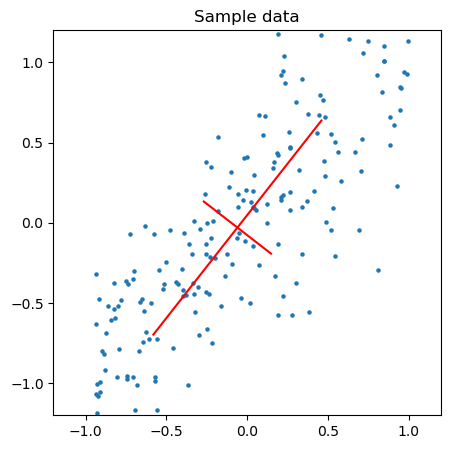

In [98]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("Sample data")
mean = np.mean(X, axis=0)
for i in range(len(eigenvalues)):
    vector = eigenvectors[:, i] * np.sqrt(eigenvalues[i])
    plt.plot([mean[0] - vector[0], mean[0] + vector[0]], 
             [mean[1] - vector[1], mean[1] + vector[1]], c='r')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.show()

## Projection to the hyperplane

We now discuss projection to the hyperplane. Let $w_1, w_2,..., w_K$ be an orthonormal basis of the hyperplane. Then given $x_i$, the projection onto the hyperplane is given by 

$$\sum_{k=1}^K (w_k^Tx_i)w_k$$

Like before, we want to find $w_1,..., w_K$ that minimizes the reconstruction error

$$\min_{w_1, w_2,.., w_K} \frac{1}{n}\sum_{i=1}^n ||x_i-\sum_{k=1}^K (w_k^Tx_i)w_k||_2^2$$

By the same argument as the case of a line, it can be shown that the above is equivalent to 

$$\max_{w_1, w_2,.., w_K} \frac{1}{n}\sum_{i=1}^n \sum_{k=1}^K (w_k^Tx_i)^2$$

Let $X$ be the design matrix, then we can rewrite the above as

$$\max_{w_1, w_2,.., w_K} \sum_{k=1}^K w_k^T\Sigma w_k$$

Since $\Sigma$ is a positive semidefinite matrix, we can diagonalize it $\Sigma = UDU^T$, where $U$ is orthonormal matrix. 

<img src="./images/Lenna.jpeg" alt="Image Description" width="200" height="300">

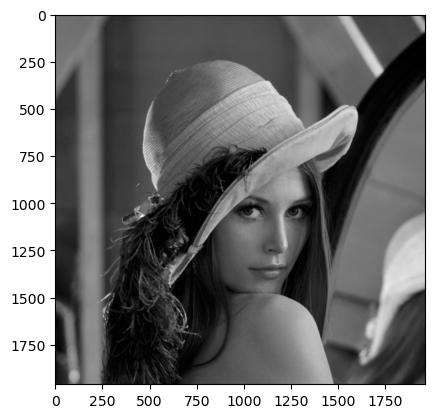

In [7]:
image = cv2.imread('./images/Lenna.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
image

array([[114, 115, 115, ...,  36,  33,  36],
       [114, 115, 116, ...,  36,  32,  35],
       [114, 116, 116, ...,  37,  35,  38],
       ...,
       [ 36,  35,  35, ...,  84,  82,  81],
       [ 37,  35,  35, ...,  84,  83,  83],
       [ 41,  37,  35, ...,  82,  84,  86]], dtype=uint8)